In [20]:
import numpy as np
import pandas as pd
import os
import random
import sys
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import inception_v3
import os
import torch.nn.functional as F
import matplotlib.cm as cm
import cv2
from PIL import Image

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
def load_Iv3(path=None):
    Iv3 = inception_v3(pretrained=False)

    num_classes = 6

    num_in_ft1 = Iv3.AuxLogits.fc.in_features
    Iv3.AuxLogits.fc = nn.Linear(num_in_ft1, num_classes)

    num_in_ft2 = Iv3.fc.in_features
    Iv3.fc = nn.Linear(num_in_ft2, num_classes) 

    Iv3.to(device)
    
    if path:
        Iv3.load_state_dict(torch.load(path))
    else:
        Iv3.load_state_dict(torch.load(os.path.join(os.getcwd(),'model','Iv3_3')))
    
    return Iv3

In [10]:
def test(model, test_loader):
    test_corrects = 0
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    
    model.eval()
    with torch.no_grad():
    
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
        
            outputs = model(inputs)
        
            _,preds = torch.max(outputs,1)
            
            all_preds = torch.cat((all_preds, preds.float()), dim=0)
            all_labels = torch.cat((all_labels,labels.float()), dim=0)
        
            test_corrects += torch.sum(preds == labels.data)
        
        test_acc = test_corrects.double()/len(test_loader.sampler)
    
    return test_corrects, test_acc, all_preds, all_labels

In [35]:
def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image succesfully loaded")
    return image

def normalize(image, transform):
    image = transform(image)
    image = image.cuda()
    image = image.unsqueeze(0)
    return image

def predict(model, image):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _,pred = torch.max(output,1)
        
        if pred.item() == 0:
            name = 'normal'
        elif pred.item() == 1:
            name = 'diabetes'
        elif pred.item() == 2:
            name = 'disc'
        elif pred.item() == 3:
            name = 'macular'
        elif pred.item() == 4:
            name = 'myopia'
        elif pred.item() == 5:
            name = 'retina-vessel'
    print('Prediction: {} {}'.format(pred.item(),name))

In [8]:
Iv3 = load_Iv3()

C:\Users\york\anaconda3\envs\tf_AI\lib\site-packages\torchvision\models\inception.py:77: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


In [9]:
Iv3

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [12]:
input_size = 299

test_transform = transforms.Compose([
    transforms.Resize((input_size,input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
]) 

In [24]:
def show_predict(path, model=Iv3, transform=test_transform):
    image = load_image(path)
    image_norm = normalize(image, transform)
    predict(model, image_norm)

Prediction: 4 myopia


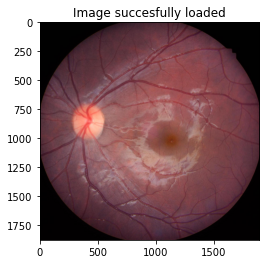

In [36]:
path = r'C:\Users\york\new-multi-eye-disease-detection\-211456\vk210945.jpg'

show_predict(path)

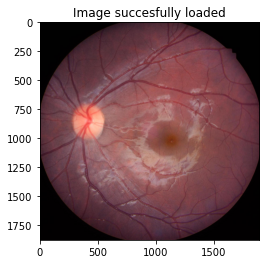

In [26]:
image = load_image(path)
im_n = normalize(image,test_transform)

In [27]:
a = Iv3
a.eval()
with torch.no_grad():
    output = a(im_n)
    _,pred = torch.max(output,1)

In [30]:
pred.item() == 4

True

In [33]:
print('Prediction: {} {}'.format('1','aa') )

Prediction: 1 aa
